# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
plt.style.use('fivethirtyeight')
import scipy.stats as stats

df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [25]:
feature_names

NameError: name 'feature_names' is not defined

In [11]:
# Your code here
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [17]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# Record your observations here 
#looks like most of the columns present continuous data (no categorical data) as all data types are 
#either float or int except for chas which appears to be binary? There are no null values in the dataset

### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

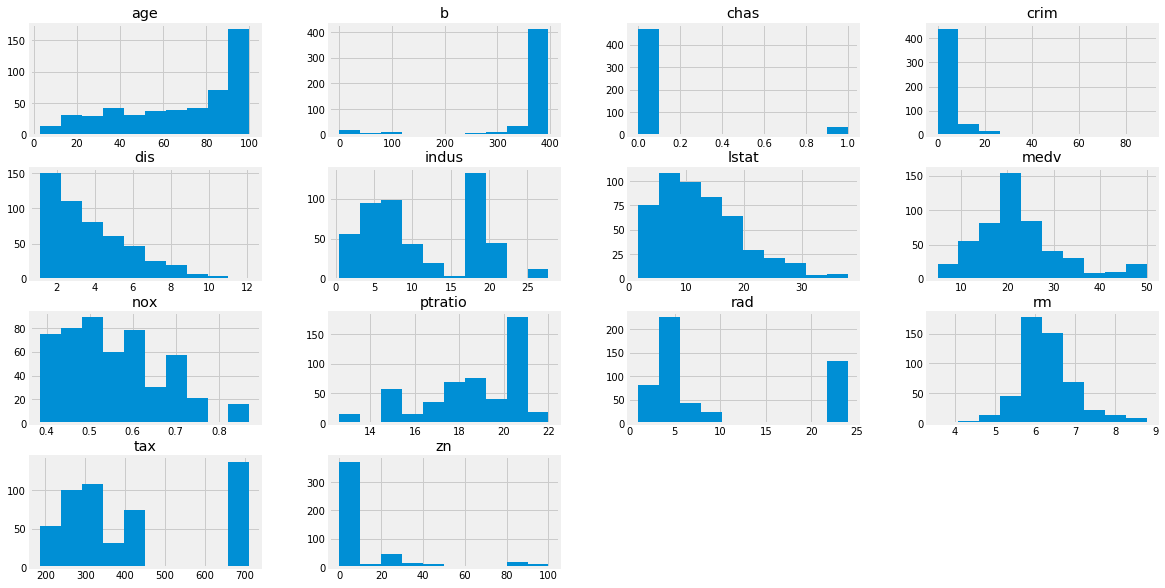

In [22]:
df.hist(figsize=(18,10) );

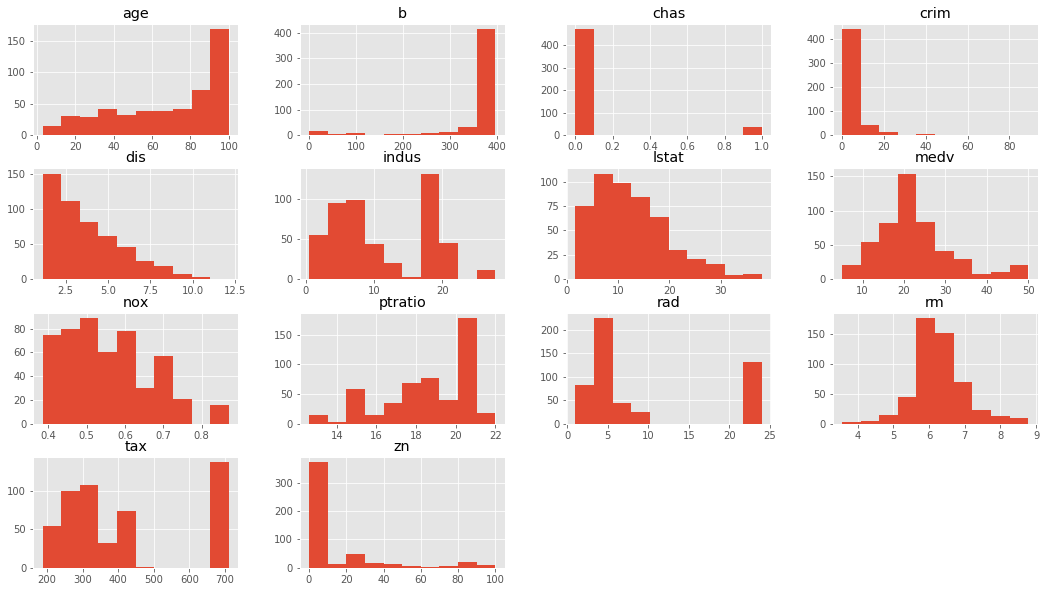

In [115]:
# Your code here 

In [116]:
# You observations here 
#most don't appear to have normal distributions, but the closest are rm and medv. the rest have a lot of skewnwss
#and kurtosis, and some have right tail outliers (rad, zn, chas)

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [26]:
# Your code here
new_df = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']].copy()
new_df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

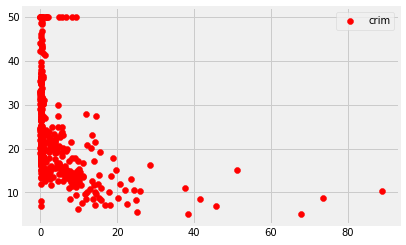

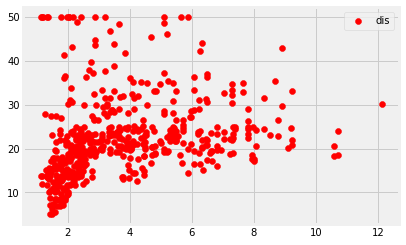

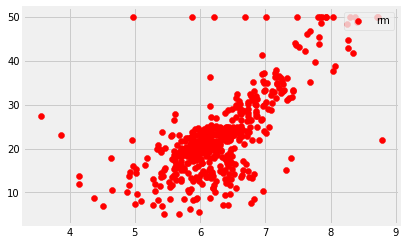

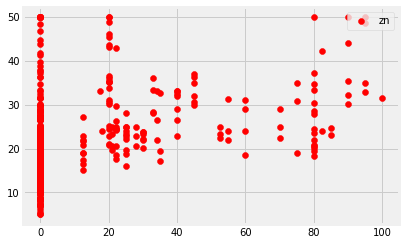

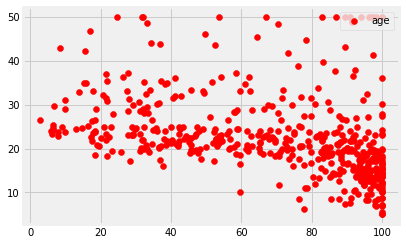

In [33]:
for col in ['crim', 'dis', 'rm', 'zn', 'age']:
    plt.scatter(new_df[col], new_df.medv, c="red", label = col)
    plt.legend(loc=1)
    plt.show()

In [ ]:
# Your observations here 
#rm seems to be the only one to offer much in the way of linearity in the relationship with medv, followed by dis.
#more normalization of the data would be required because there is too much unpredictability in y, medv.

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~crim
------------------------------------------------------------------
R-Squared:  0.15078046904975706
Intercept    24.033106
crim         -0.415190
dtype: float64


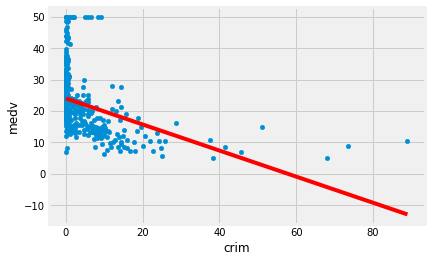

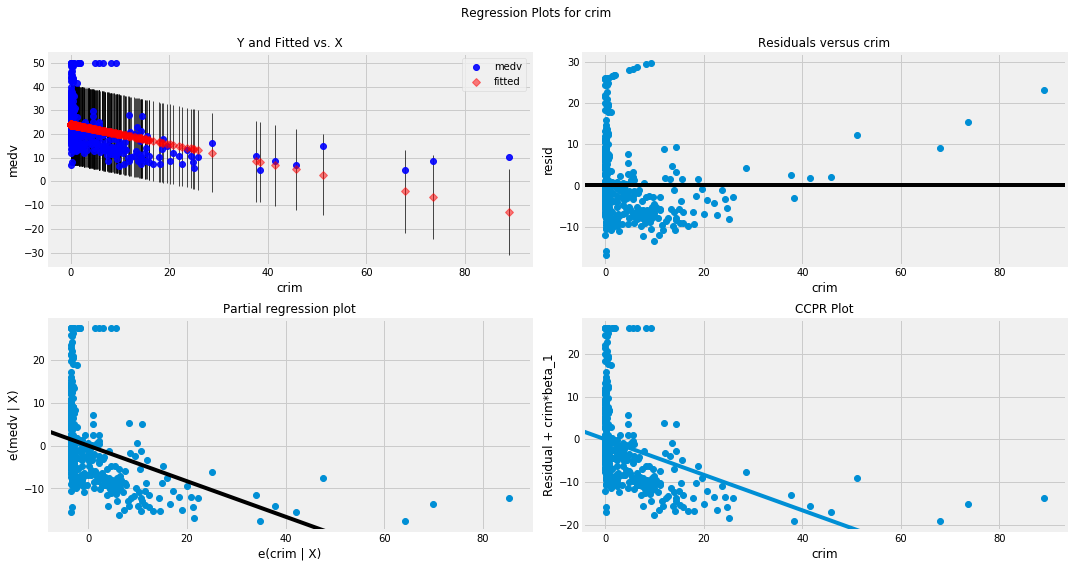

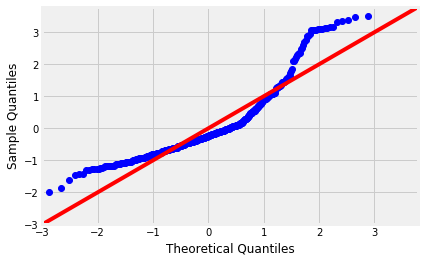

Press Enter to continue...
Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~dis
------------------------------------------------------------------
R-Squared:  0.062464372121782796
Intercept    18.390088
dis           1.091613
dtype: float64


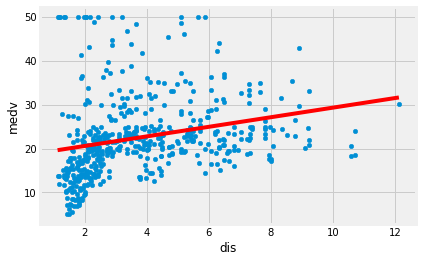

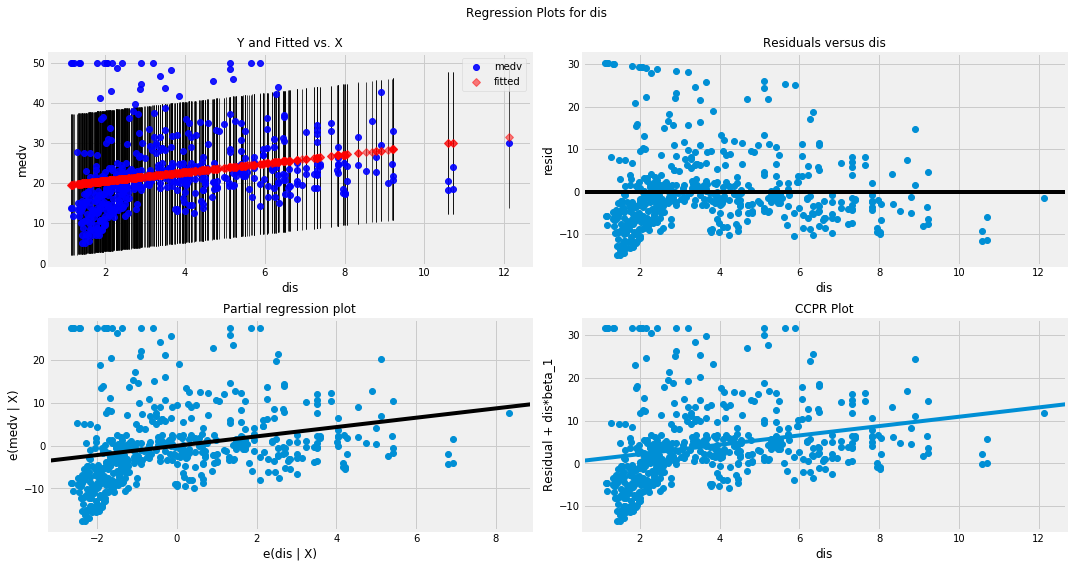

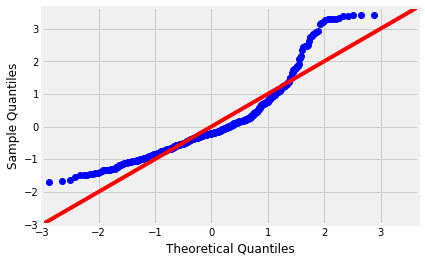

Press Enter to continue...
Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~rm
------------------------------------------------------------------
R-Squared:  0.4835254559913341
Intercept   -34.670621
rm            9.102109
dtype: float64


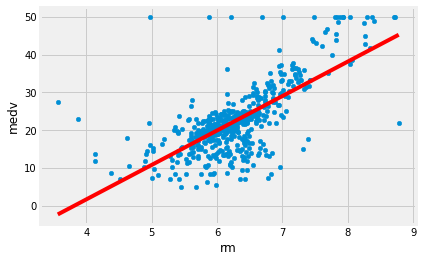

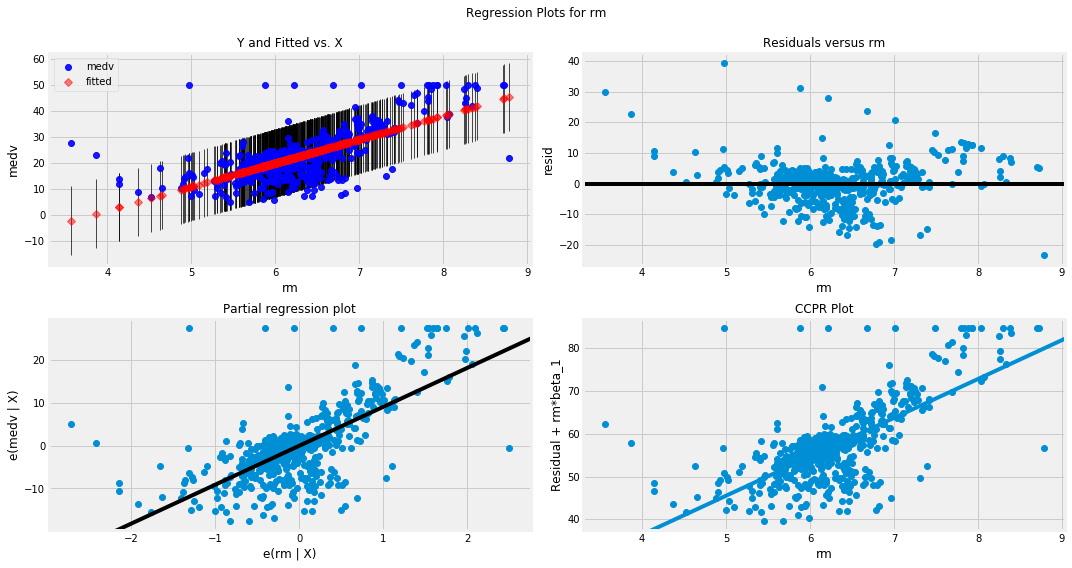

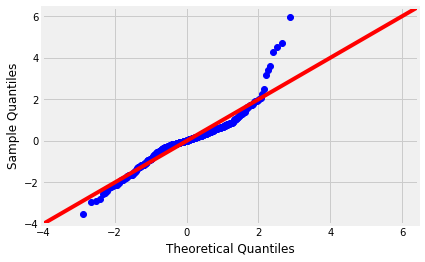

Press Enter to continue...
Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~zn
------------------------------------------------------------------
R-Squared:  0.12992084489428946
Intercept    20.917579
zn            0.142140
dtype: float64


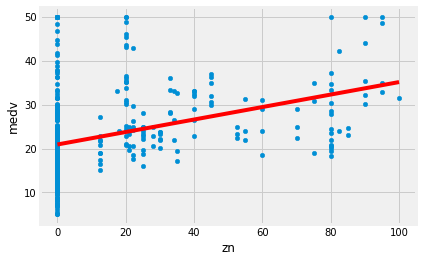

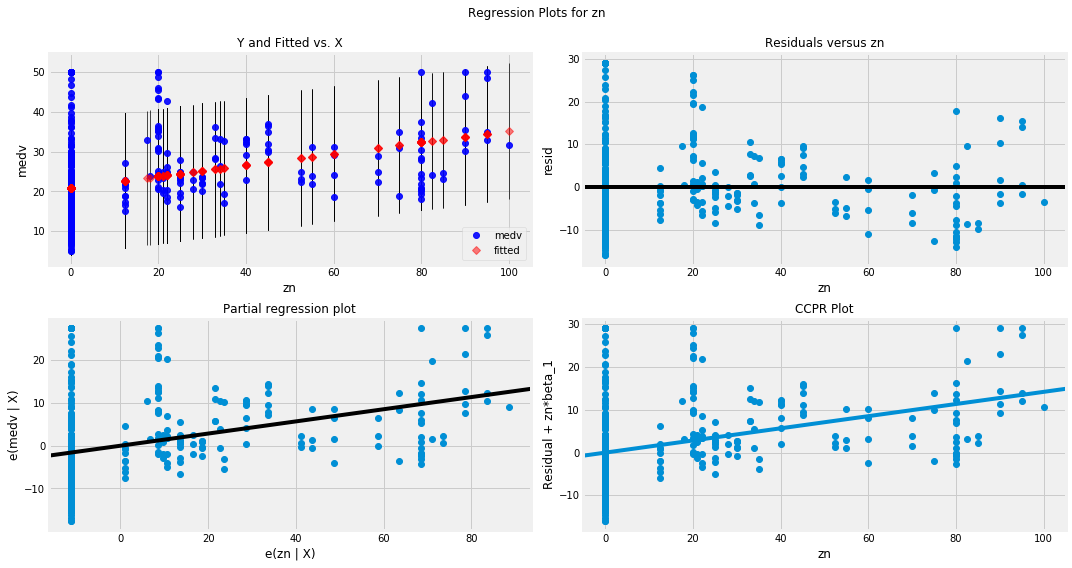

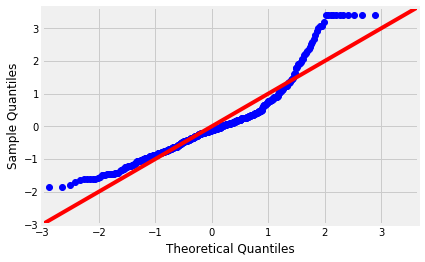

Press Enter to continue...
Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~age
------------------------------------------------------------------
R-Squared:  0.14209474407780465
Intercept    30.978678
age          -0.123163
dtype: float64


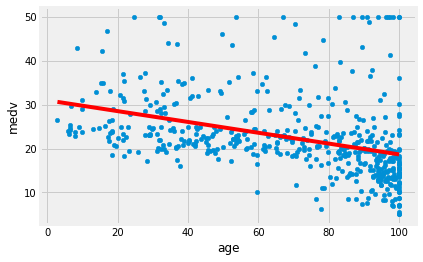

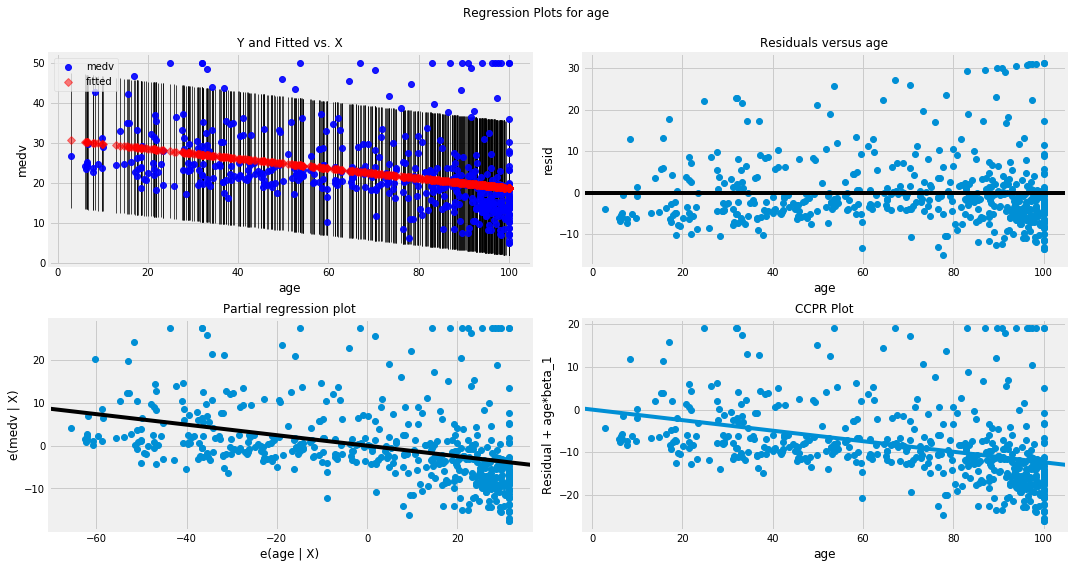

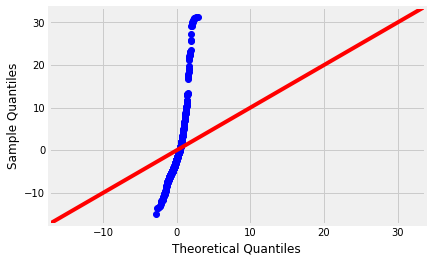

Press Enter to continue...


In [37]:
output = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality_JB']]

for idx, val in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    print("Boston Housing Dataset - Regression Analysis and Diagnostics for forumula: medv~" + val)
    print("------------------------------------------------------------------")
    
    f='medv~'+val
    
    model = smf.ols(formula=f, data=new_df).fit()
    print("R-Squared: ", model.rsquared)
    print(model.params)
    
    X_new = pd.DataFrame({val: [new_df[val].min(), new_df[val].max()]});
    preds = model.predict(X_new)
    new_df.plot(kind='scatter', x=val, y='medv');
    plt.plot(X_new, preds, c='red')
    plt.show()
    
    fig=plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, )
    plt.show()
    
    output.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")


In [39]:
pd.DataFrame(output)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality_JB
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [118]:
#Your obervations here 
#overall - none of the residuals are normally distributed (per the JB test)
#in line with the visual inspection earlier, it appears that rm has the highest r-squared with medv (.49), meaning
#that nearly 50% of the variation in medv can be explained by changes in rv. crim and age, while weakly correlated with
#with medv do show an inverse relationship meaning that an increase in crim or age is associated with a decrease in 
#housing value. The other variables have positive relationships with medv, but apart from rm, they all have
#low r-squareds are are not good predictors of medv.
#signs of heterskedasticity in dis and age. Age's qqplots show the least amount of normality, while others
#show signs of outliers.

So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 